Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64
Linhas com valores negativos:
         Idade  Renda Anual (em $)     Gênero  Tempo no Site (min)  \
107  38.510526        50000.000000  Masculino                 -1.0   
116  40.000000        30000.000000  Masculino                 -1.0   
132  38.510526        50000.000000  Masculino                 -1.0   
133  20.000000        58253.968254        NaN                 -1.0   
147  54.000000        70000.000000  Masculino                 -1.0   

    Anúncio Clicado  Compra (0 ou 1)  
107             Sim                0  
116             Sim                0  
132             NaN                0  
133             Sim                0  
147             Sim                1  


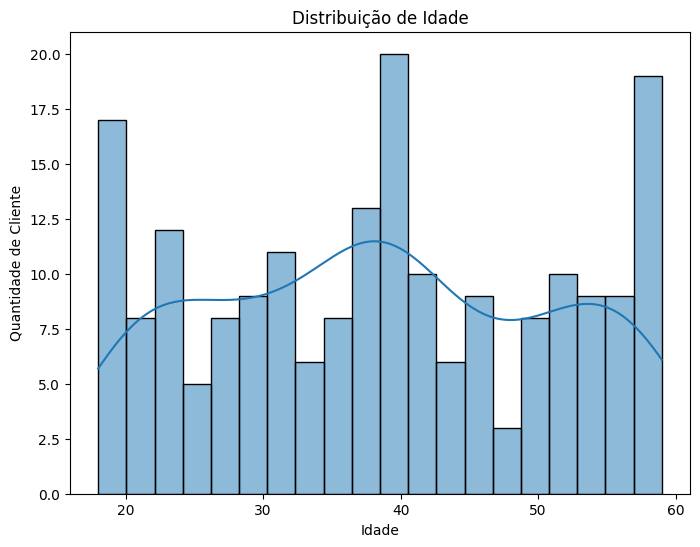

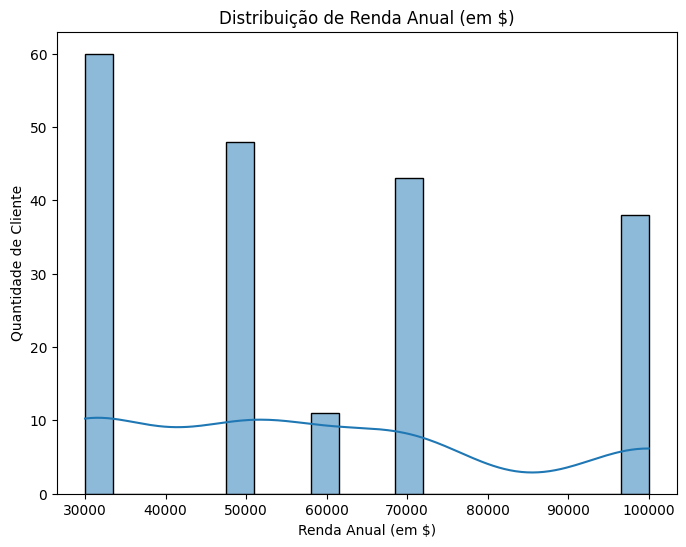

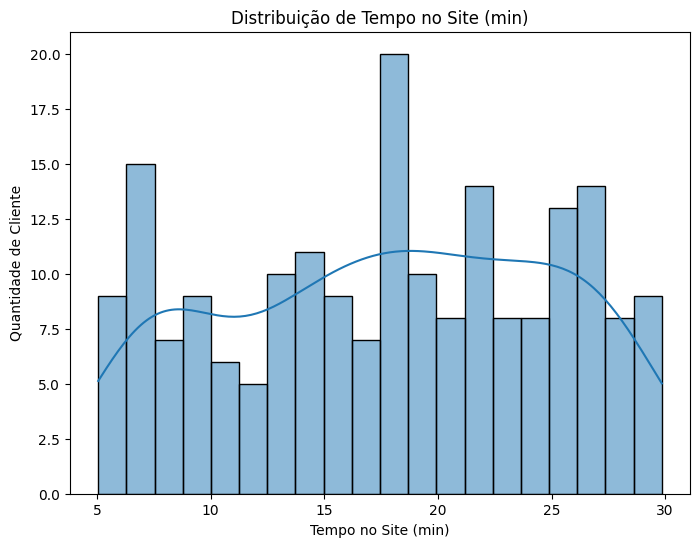

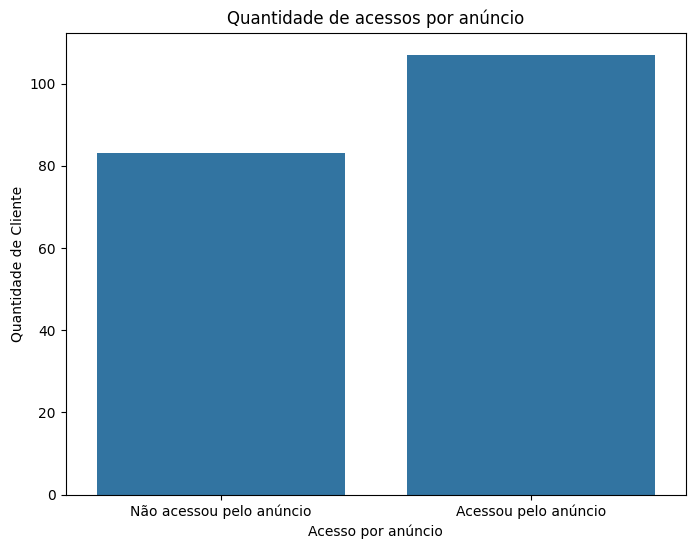

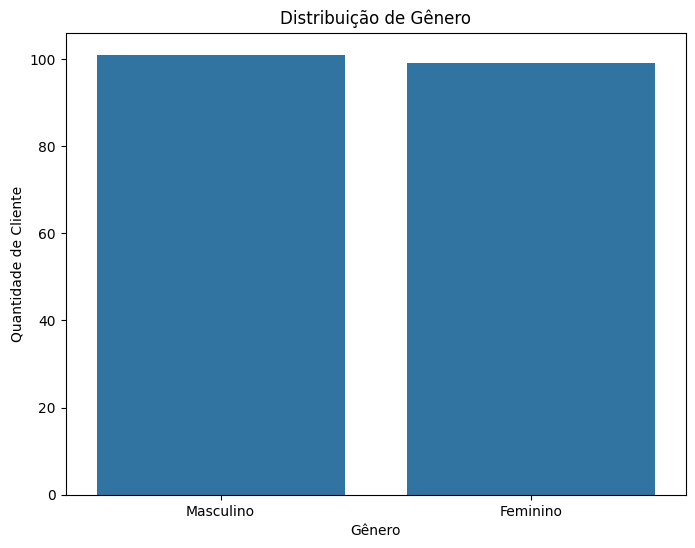

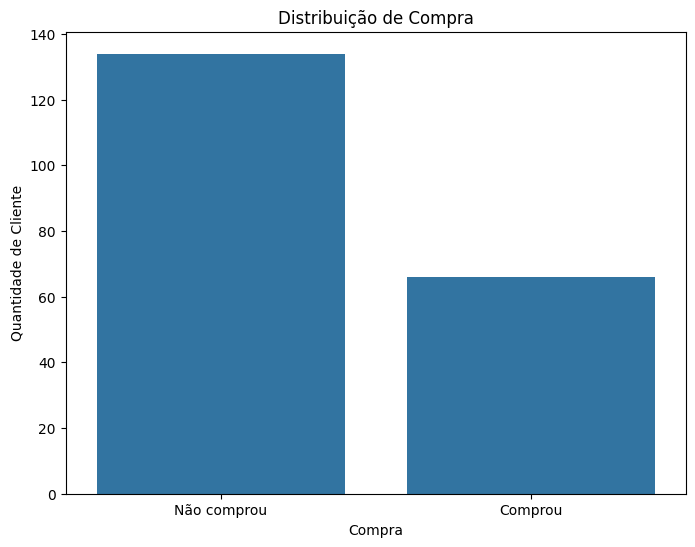

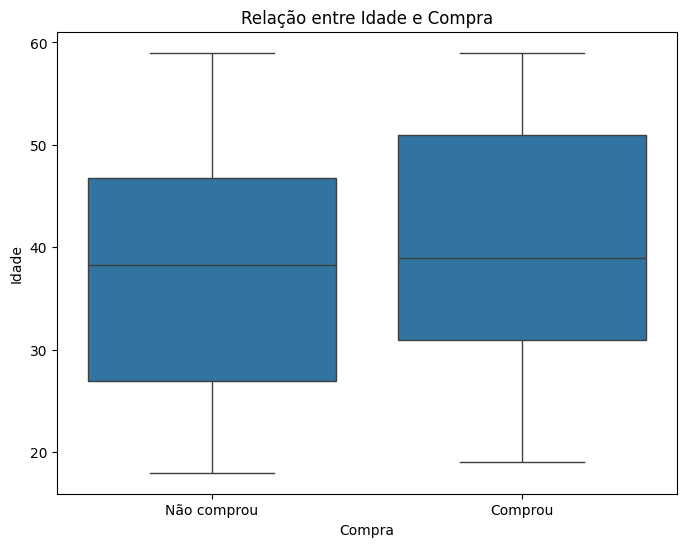

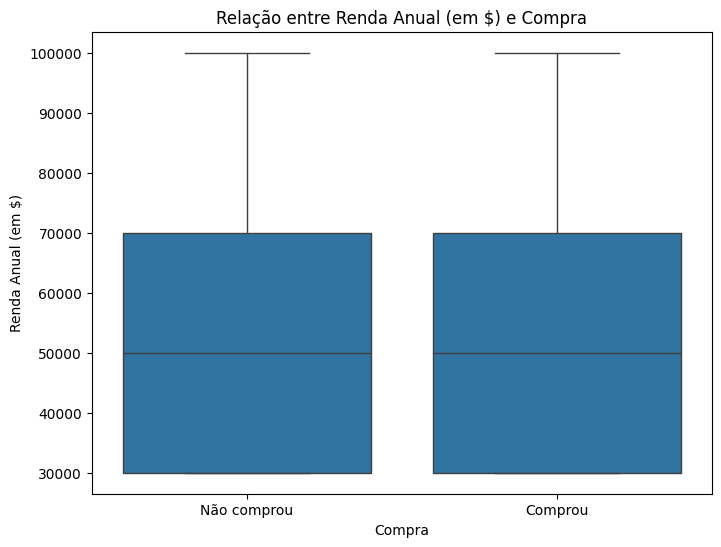

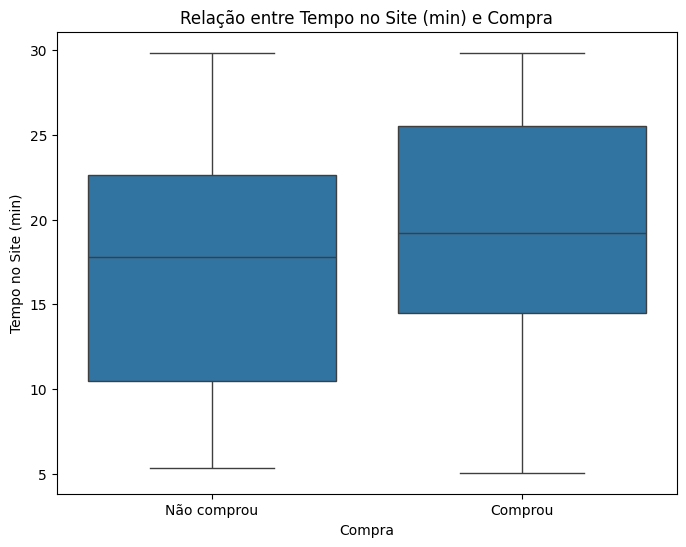

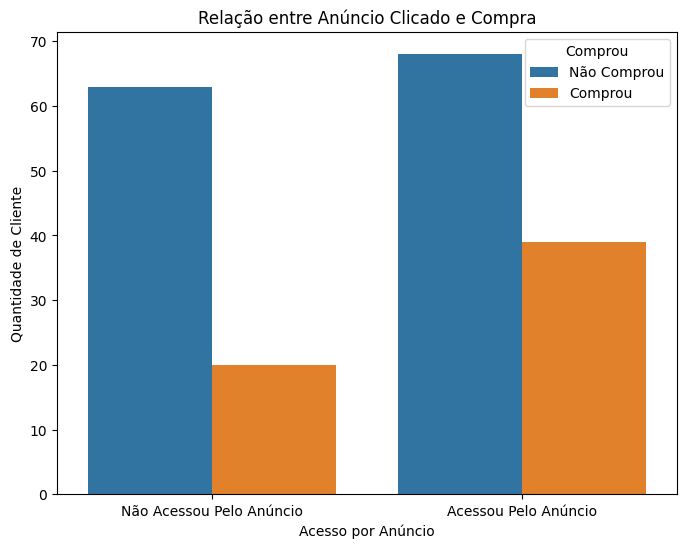

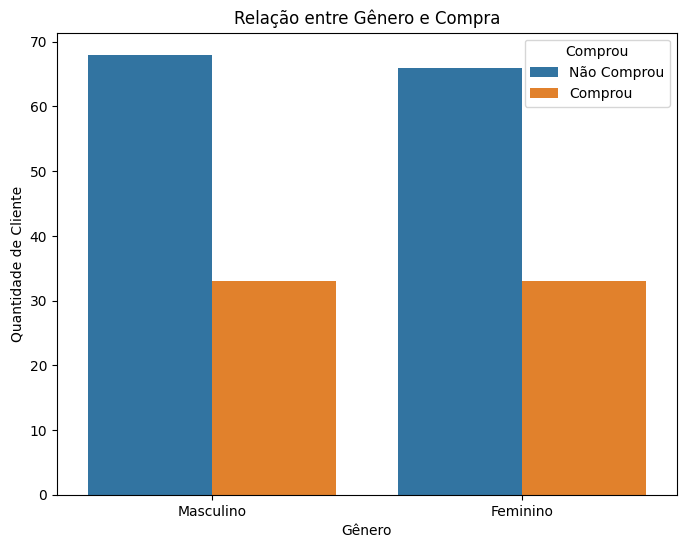


--- Random Forest ---
Matriz de Confusão:
[[32  2]
 [18  5]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76        34
           1       0.71      0.22      0.33        23

    accuracy                           0.65        57
   macro avg       0.68      0.58      0.55        57
weighted avg       0.67      0.65      0.59        57

Acurácia: 0.65

--- Regressão Logística ---
Matriz de Confusão:
[[34  0]
 [22  1]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        34
           1       1.00      0.04      0.08        23

    accuracy                           0.61        57
   macro avg       0.80      0.52      0.42        57
weighted avg       0.77      0.61      0.48        57

Acurácia: 0.61

--- Árvore de Decisão ---
Matriz de Confusão:
[[21 13]
 [14  9]]
Relatório de Classificação:
              precision    recall  f

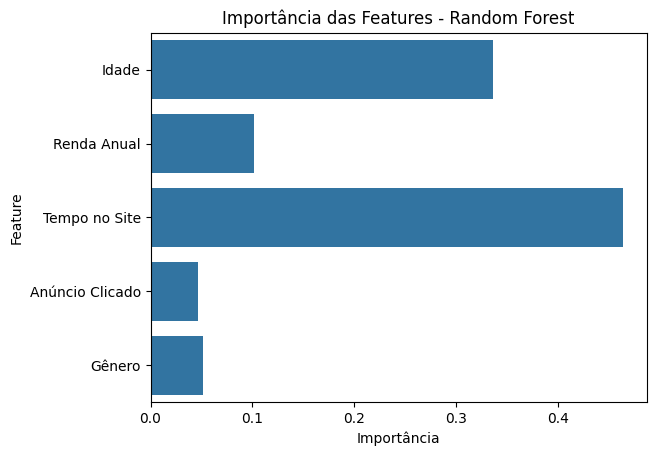

Scores de validação cruzada:  [0.71052632 0.52631579 0.71052632 0.68421053 0.63157895]
Acurácia média de Random Forest: 0.65
Scores de validação cruzada:  [0.76315789 0.68421053 0.68421053 0.60526316 0.68421053]
Acurácia média da Regressão Logística: 0.6842105263157895
Scores de validação cruzada:  [0.52631579 0.55263158 0.60526316 0.52631579 0.52631579]
Acurácia média da Árvore de Decisão: 0.5473684210526315
Melhor pontuação: 0.6692307692307692


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Dataset.csv')

#fazendo a media para dados numericos
print(data.isnull().sum())
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

#fazendo a media para dados negativos
negativos = data[data['Tempo no Site (min)'] < 0]
print(f"Linhas com valores negativos:\n{negativos}")
data['Tempo no Site (min)'] = data['Tempo no Site (min)'].apply(lambda x: np.nan if x < 0 else x)
data['Tempo no Site (min)'] = data['Tempo no Site (min)'].fillna(data['Tempo no Site (min)'].mean())

#dados tratados onde o nulo vira a média
data['Tempo no Site (min)'] = data['Tempo no Site (min)'].fillna(data['Tempo no Site (min)'].mean())
data['Idade'] = data['Idade'].fillna(data['Idade'].mean())
data['Renda Anual (em $)'] = data['Renda Anual (em $)'].fillna(data['Renda Anual (em $)'].mean())

#tratando o dado de genero
data = pd.get_dummies(data, columns=['Gênero'], drop_first=True)

#tratando o dado de anuncio clicado
data['Anúncio Clicado'] = data['Anúncio Clicado'].map({'Sim': 1, 'Não': 0})

#criacao de grafico de idade, renda e tempo para verificação da distribuição
numerical_columns = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
    plt.ylabel('Quantidade de Cliente')
    plt.show()

#criacao do grafico de acesso por anuncio
plt.figure(figsize=(8, 6))
sns.countplot(x='Anúncio Clicado', data=data)
plt.title('Quantidade de acessos por anúncio')
plt.xlabel('Acesso por anúncio')
plt.ylabel('Quantidade de Cliente')
plt.xticks([0, 1], ['Não acessou pelo anúncio', 'Acessou pelo anúncio'])
plt.show()

#criacao do grafico de genero
plt.figure(figsize=(8, 6))
sns.countplot(x='Gênero_Masculino', data=data)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Cliente')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.show()

#criacao do grafico de compra
plt.figure(figsize=(8, 6))
sns.countplot(x='Compra (0 ou 1)', data=data)
plt.title('Distribuição de Compra')
plt.xlabel('Compra')
plt.ylabel('Quantidade de Cliente')
plt.xticks([0, 1], ['Não comprou', 'Comprou'])
plt.show()

#criacao do grafico de comparacao entre compras e idade, renda e tempo 
numerical_columns = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Compra (0 ou 1)', y=col, data=data)
    plt.title(f'Relação entre {col} e Compra')
    plt.xlabel('Compra')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Não comprou', 'Comprou'])
    plt.show()

#criacao do grafico de comparacao entre compras e anuncio clicado
plt.figure(figsize=(8, 6))
sns.countplot(x='Anúncio Clicado', hue='Compra (0 ou 1)', data=data)
plt.title('Relação entre Anúncio Clicado e Compra')
plt.xlabel('Acesso por Anúncio')
plt.ylabel('Quantidade de Cliente')
plt.xticks([0, 1], ['Não Acessou Pelo Anúncio', 'Acessou Pelo Anúncio'])
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Comprou' if label == '1' else 'Não Comprou' for label in labels]
plt.legend(handles=handles, labels=labels, title='Comprou')
plt.show()

#criacao do grafico de comparacao entre compras e genero
plt.figure(figsize=(8, 6))
sns.countplot(x='Gênero_Masculino', hue='Compra (0 ou 1)', data=data)
plt.title('Relação entre Gênero e Compra')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Cliente')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Comprou' if label == '1' else 'Não Comprou' for label in labels]
plt.legend(handles=handles, labels=labels, title='Comprou')
plt.show()

#dividindo os conjuntos de treino e teste 
X = data[['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)', 'Anúncio Clicado', 'Gênero_Masculino']]
y = data['Compra (0 ou 1)']
X = X.dropna()
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#avaliacao do modelo com as metricas encontradas
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"\n--- {nome} ---")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

#uso dos conjuntos de treino e teste para o treinamento pelo modelo random forest 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
avaliar_modelo("Random Forest", rf_model, X_test, y_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
avaliar_modelo("Regressão Logística", log_model, X_test, y_test)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
avaliar_modelo("Árvore de Decisão", tree_model, X_test, y_test)

#ajustes para o grafico da importância de cada dado para a compra na random forest
importances = rf_model.feature_importances_
features = X.columns

feature_names = {
    'Idade': 'Idade',
    'Renda Anual (em $)': 'Renda Anual',
    'Tempo no Site (min)': 'Tempo no Site',
    'Anúncio Clicado': 'Anúncio Clicado',
    'Gênero_Masculino': 'Gênero'
}
features_renamed = [feature_names.get(feature, feature) for feature in features]

sns.barplot(x=importances, y=features_renamed)
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

#validacao cruzada de cada metodo para analise e busca de melhoria 
rf_model = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Scores de validação cruzada: ", scores)
print(f"Acurácia média de Random Forest: {scores.mean():.2f}")

log_model = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
print("Scores de validação cruzada: ", log_scores)
print("Acurácia média da Regressão Logística:", log_scores.mean())

tree_model = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
print("Scores de validação cruzada: ", tree_scores)
print("Acurácia média da Árvore de Decisão:", tree_scores.mean())

#hiperparametro em relação a random forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 0.5, None]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Melhor pontuação:", grid_search.best_score_)